<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/plotting_and_stats_pipeline_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

latest update: MLB. JuL23, 2023

# Prep

In [ ]:
# Mount the Google Drive to the Google Colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import auth
auth.authenticate_user()

!pip install scikit-posthocs
import math
import time
import os
import sys
import glob
import cv2
import seaborn as sns
import numpy as np
import scikit_posthocs as sp
import pandas as pd
import scipy
import scipy.stats as stats
from scipy.stats import circmean, circvar, circstd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(font_scale=3)
sns.set_style("white")

Mounted at /content/drive


In [ ]:
# run this to import & update modules when you make changes in the utils.ipynb
%cd '/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper'
%run data_processing_utils.ipynb

/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper


In [ ]:
# directories for the data and analysis

experiment_class = 'Development_Exp'
tab_name = 'development'

path = '/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/'+experiment_class+'/'
gsheet = 'https://docs.google.com/spreadsheets/d/1ud4Ifs4Sw3Kth9x_74JBBqgY0MvTXCbLroHDKO8mvQI/edit?usp=sharing'

metadata = read_metadata(gsheet,tab_name)
experiments = metadata.index

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Development/'

,experiment,exp_type,rig_ver,age,fish_num,fps_Hz,rig_mm,vid_px,trim,wall_pos_px,notes,tracking,habx,video,raw_vid_name,Avg_body_length_mm
0,labels.vDavid_all_2wks.000_2wpf_091522_1.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
1,labels.vDavid_all_2wks.001_2wpf_091522_2.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
2,labels.vDavid_all_2wks.002_2wpf_091522_3.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
3,labels.vDavid_all_2wks.003_2wpf_091522_4.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
4,labels.vDavid_all_2wks.004_2wpf_091522_5.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
5,labels.vDavid_all_2wks.005_2wpf_091522_6.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
6,labels.vDavid_all_2wks.006_2wpf_061622_1.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
7,labels.vDavid_all_2wks.007_2wpf_061622_2.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
8,labels.vDavid_all_2wks.008_2wpf_061622_3.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4
9,labels.vDavid_all_2wks.009_2wpf_061622_4.analysis,2wpf,,2wpf,4,120,150,1000,,,,,,,,4


EXAMPLE VISUALIZATION FOR FIGURE 2


36107


<Figure size 300x300 with 0 Axes>

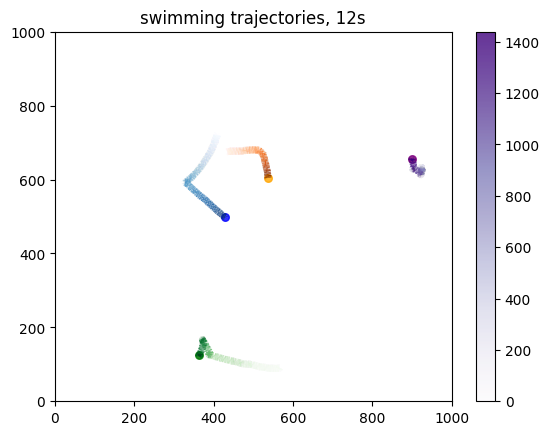

18201


<Figure size 300x300 with 0 Axes>

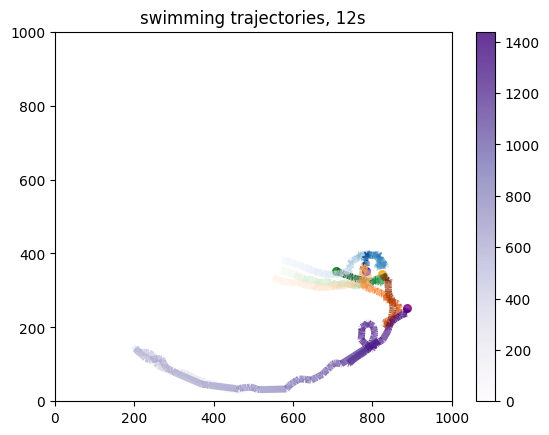

36189


<Figure size 300x300 with 0 Axes>

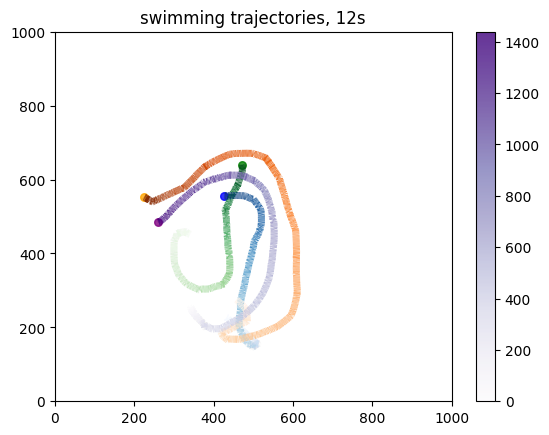

36047


<Figure size 300x300 with 0 Axes>

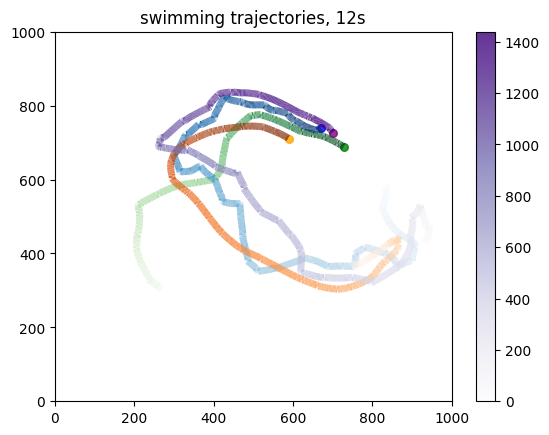

In [ ]:
#show example data
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors

# Open the video file

colorz=['Greens','Blues','Oranges','Purples', 'Greys', 'Reds' ]
colorz2=['green','blue','orange','purple', 'green', 'red']

for exp,wk,frame_start in zip(['labels.vDavid_all_2wks.002_2wpf_091522_3.analysis', 'labels.vDavid_4wpf_060222_4.analysis', 'labels.vDavid_6wpf_091522_4.analysis', 'labels.vDavid_8wpf_091622_1.analysis'],\
                  ['wk2','wk4','wk6','wk8'],\
                  [6000,4000,1500,4700]):

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength, fps = data['fish_num'], data['scale'], data['f_bodylength_mm'], data['fps']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    print(len(f_heading[0]))

    plot_length = 12*fps

    plt.figure(figsize=[3,3])
    fig, ax = plt.subplots()

    for f in range(fish_num):

        x = f_x[f][frame_start:frame_start+plot_length]
        y = f_y[f][frame_start:frame_start+plot_length]
        time = np.array(range(plot_length))

        norm = mcolors.Normalize(time.min(), time.max())
        cmap = plt.get_cmap(colorz[f])

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = mcoll.LineCollection(segments, array=time, cmap=cmap, norm=norm, linewidth=5, alpha=0.8)

        line = ax.add_collection(lc)

        plt.scatter(f_x[f][frame_start+plot_length],f_y[f][frame_start+plot_length],color=colorz2[f], alpha=0.8, s=30)

    cmap='Greys'

    fig.colorbar(line, ax=ax, cmap='Greys')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)

    plt.title('swimming trajectories, 12s')
    plt.savefig(figure_savepath +"_EXAMPLE_schooling_fullarena"+wk+".pdf", transparent=True)
    plt.show()

# Main workflow

## Level 0

In [ ]:
# info stored in npz

# lev0_basics.npz: 'exp_type', 'fish_num', int, 'scale' (mm/px)
# 'fps' (Hz), 'f_bodylength_mm','f_bodylength_px'
# 'f_nosex','f_nosey','f_x','f_y','f_tailx','f_taily'
# 'f_heading','f_tail_angle','f_speed','f_ang_speed'

# lev0_neighbor_stats.npz
# 'ff_dist','ff_align':,'f_IID','f_IIA'
# 'f_closest','f_closest_dist','f_closest_align'

# lev1_egomaps_full_experiment.npz
#'occupancy_maps','f_alignment_maps'
#'f_speed_maps', 'f_ang_speed_maps'

labels.vDavid_all_2wks.000_2wpf_091522_1.analysis
2wpf 4 0.15 [2.19162219 1.98041328 2.19828952 2.20026971]


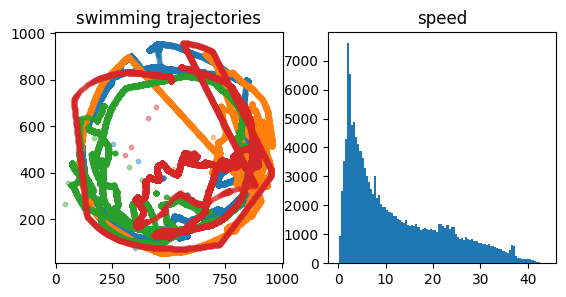

labels.vDavid_all_2wks.001_2wpf_091522_2.analysis
2wpf 4 0.15 [2.23734038 2.07935709 2.10963579 2.27348357]


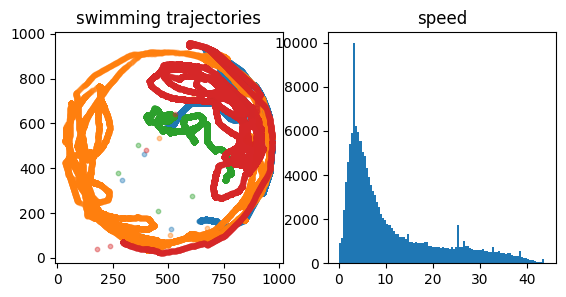

labels.vDavid_all_2wks.002_2wpf_091522_3.analysis
2wpf 4 0.15 [2.05055245 1.75539599 2.08650783 2.13901834]


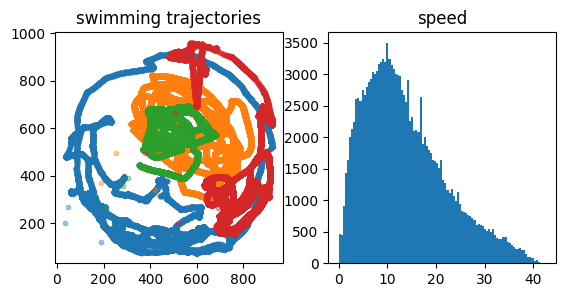

labels.vDavid_all_2wks.003_2wpf_091522_4.analysis
2wpf 4 0.15 [2.06806784 2.09317204 1.99560255 1.86411228]


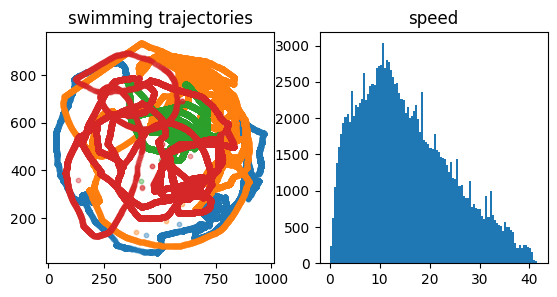

labels.vDavid_all_2wks.004_2wpf_091522_5.analysis
2wpf 4 0.15 [1.99500669 1.99743107 2.24895466 2.19955849]


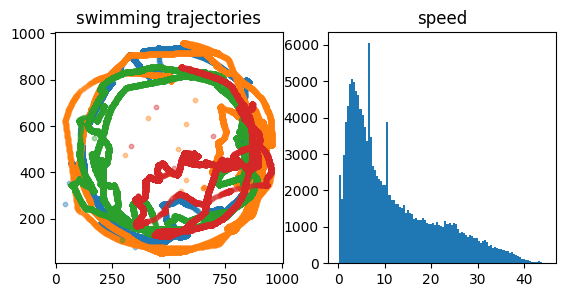

labels.vDavid_all_2wks.005_2wpf_091522_6.analysis
2wpf 4 0.15 [2.01580225 2.080736   2.13233799 2.26668104]


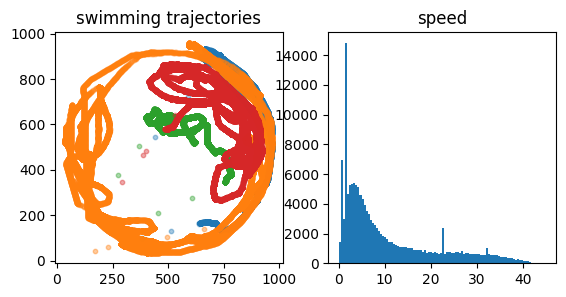

labels.vDavid_all_2wks.006_2wpf_061622_1.analysis
2wpf 4 0.15 [2.4098796  2.47700541 2.4116088  2.46345719]


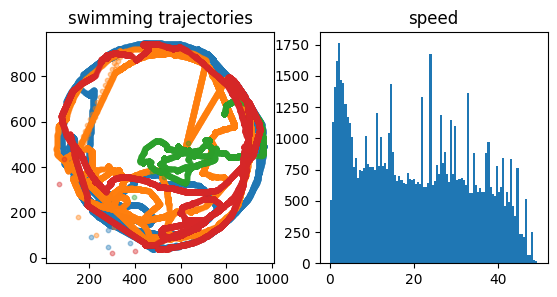

labels.vDavid_all_2wks.007_2wpf_061622_2.analysis
2wpf 4 0.15 [2.32758606 2.41709495 2.17002445 2.22903094]


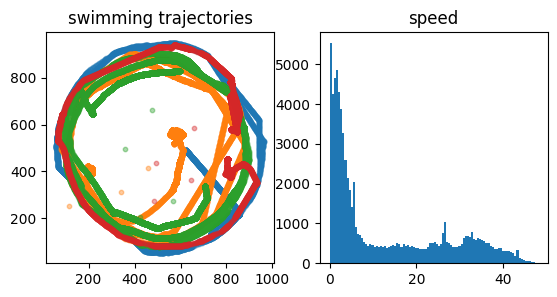

labels.vDavid_all_2wks.008_2wpf_061622_3.analysis
2wpf 4 0.15 [2.5418775  2.46344296 2.46688133 2.49848138]


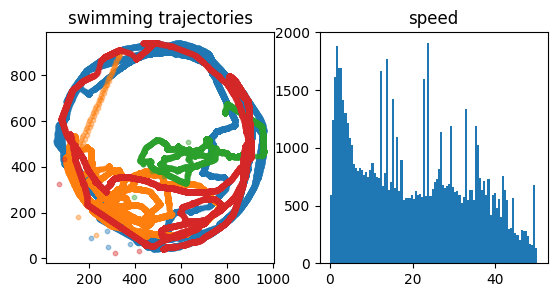

labels.vDavid_all_2wks.009_2wpf_061622_4.analysis
2wpf 4 0.15 [2.20732922 2.23250692 2.20892036 2.39197482]


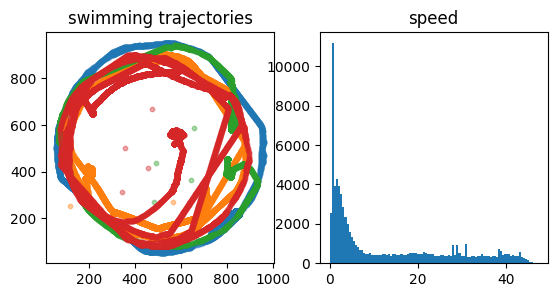

labels.vDavid_4wpf_060222_1.analysis
4wpf 4 0.3 [4.83220238 4.81023194 5.06292566 4.5250669 ]


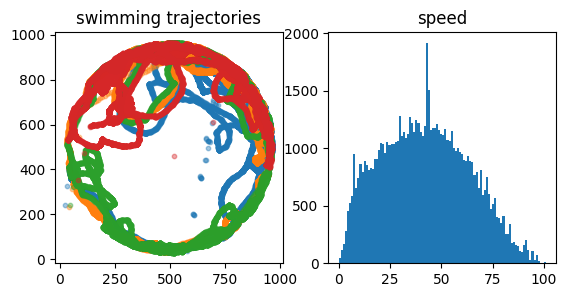

labels.vDavid_4wpf_060222_2.analysis
4wpf 4 0.3 [4.65661808 5.07921745 4.69045744 4.54379001]


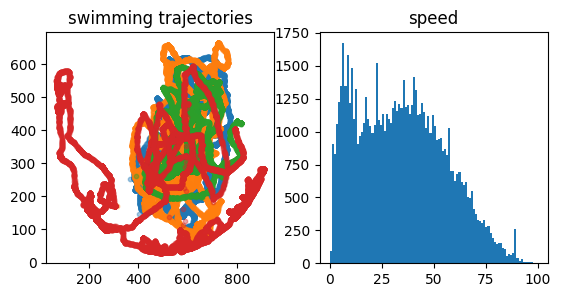

labels.vDavid_4wpf_060222_3.analysis
4wpf 4 0.3 [5.03419118 4.60047802 4.94616027 4.94708187]


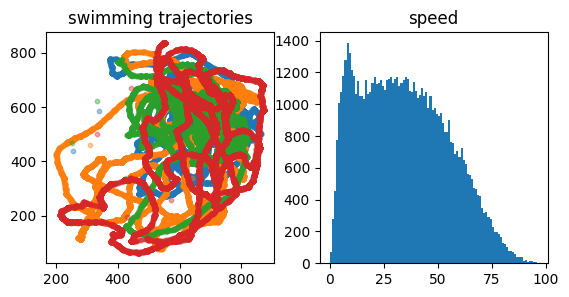

labels.vDavid_4wpf_060222_4.analysis
4wpf 4 0.3 [4.27184265 4.05549187 4.60215256 4.36884786]


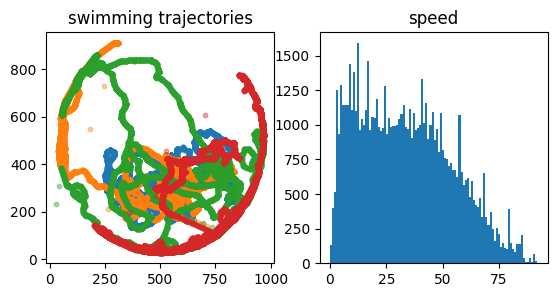

labels.vDavid_4wpf_060222_5.analysis
4wpf 4 0.3 [3.954753   4.34104768 3.56639133 3.7636258 ]


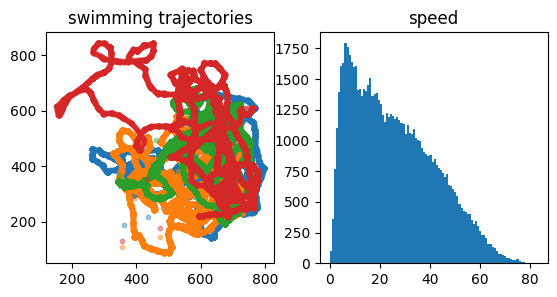

labels.vDavid_4wpf_092022_1.analysis
4wpf 4 0.3 [4.60570337 4.6252585  4.40571607 4.5318778 ]


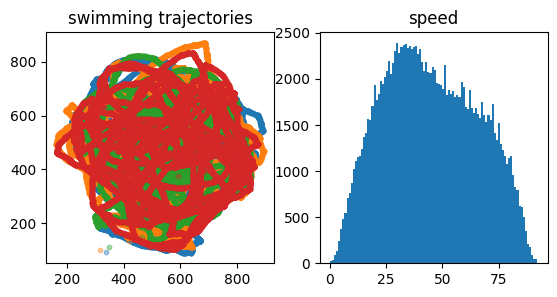

labels.vDavid_4wpf_092022_2.analysis
4wpf 4 0.3 [4.51824359 4.35211185 4.33748461 4.54455002]


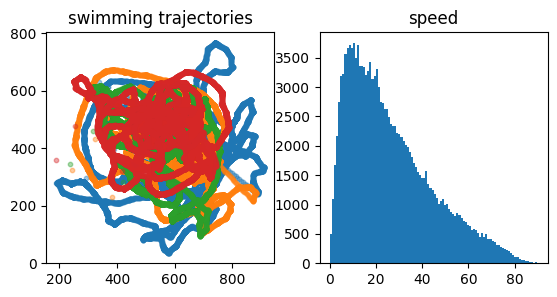

labels.vDavid_6wpf_061522_1.analysis
6wpf 4 0.3 [5.43566284 5.40000343 5.49635256 5.20923695]


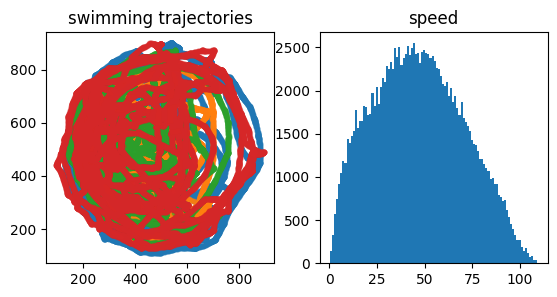

labels.vDavid_6wpf_061522_2.analysis
6wpf 4 0.3 [5.32481617 5.58999202 5.42065134 5.53997714]


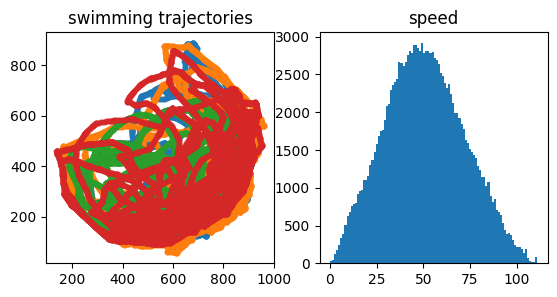

labels.vDavid_6wpf_061522_3.analysis
6wpf 4 0.3 [5.21845714 5.3403611  5.26627794 5.42689669]


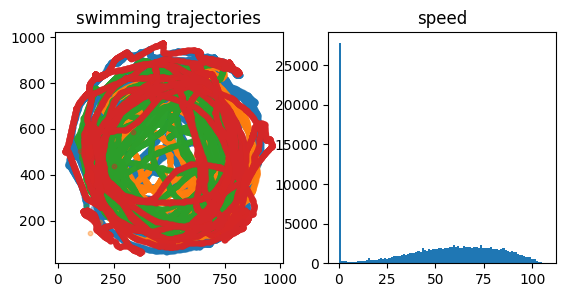

labels.vDavid_6wpf_061522_4.analysis
6wpf 4 0.3 [5.20395998 5.36018818 5.45436589 5.52860524]


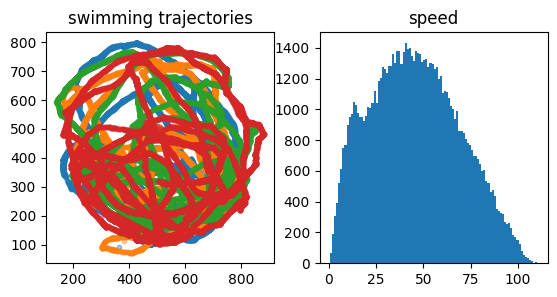

labels.vDavid_6wpf_091522_1.analysis
6wpf 4 0.3 [5.29118912 4.96155829 4.98663411 5.19862275]


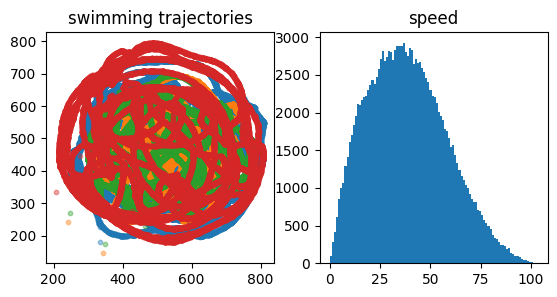

labels.vDavid_6wpf_091522_2.analysis
6wpf 4 0.3 [4.97807582 4.92602977 5.22091066 5.24267325]


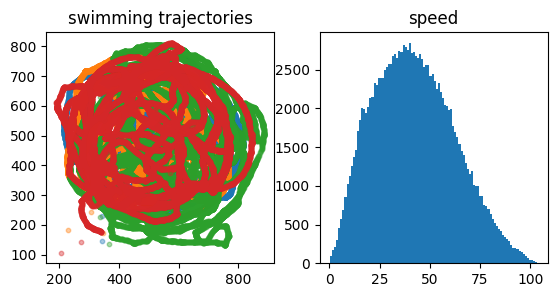

labels.vDavid_6wpf_091522_3.analysis
6wpf 4 0.3 [5.25170918 5.370713   5.41827742 5.25594187]


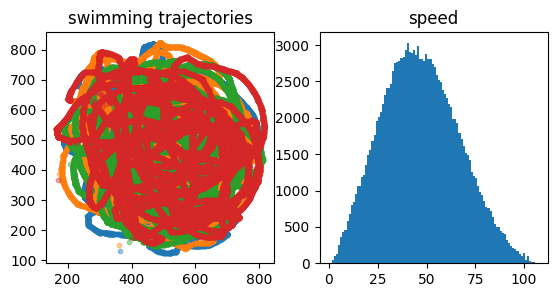

labels.vDavid_6wpf_091522_4.analysis
6wpf 4 0.3 [5.44224732 5.18511724 5.37213637 5.45657644]


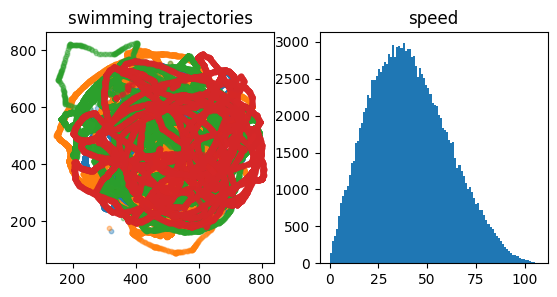

labels.vDavid_6wpf_091522_5.analysis
6wpf 4 0.3 [5.25244307 5.41146583 5.51836418 5.34391783]


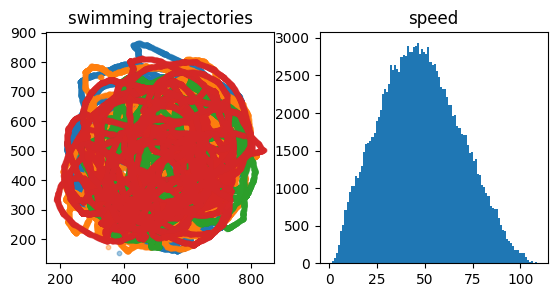

labels.vDavid_8wpf_062922_1.analysis
8wpf 4 0.3 [5.63622138 5.74542792 5.71978074 5.70847592]


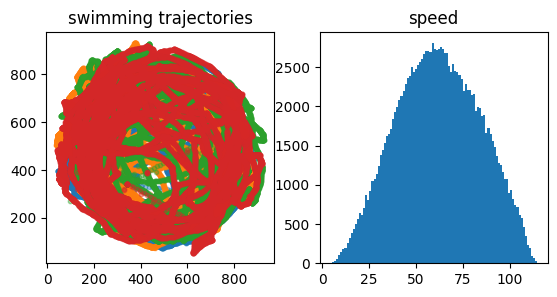

labels.vDavid_8wpf_062922_2.analysis
8wpf 4 0.3 [5.85873555 5.74476011 5.75757415 5.82194353]


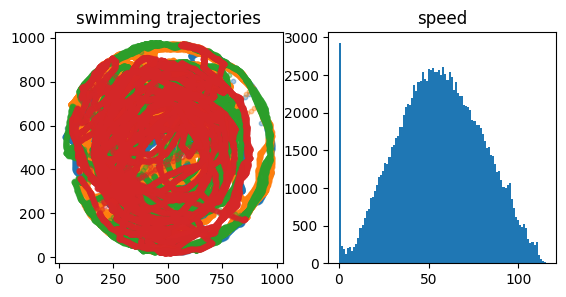

labels.vDavid_8wpf_070122_1.analysis
8wpf 4 0.3 [5.77012138 5.45618596 5.73260804 5.57900395]


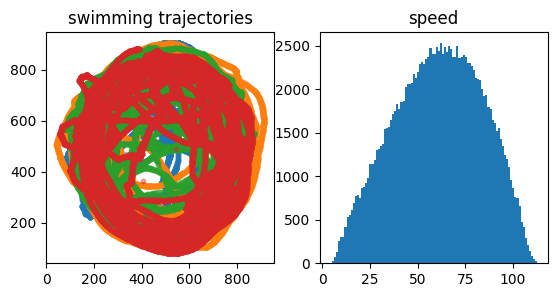

labels.vDavid_8wpf_070122_2.analysis
8wpf 4 0.3 [5.73039419 5.91667267 5.81614972 5.89759776]


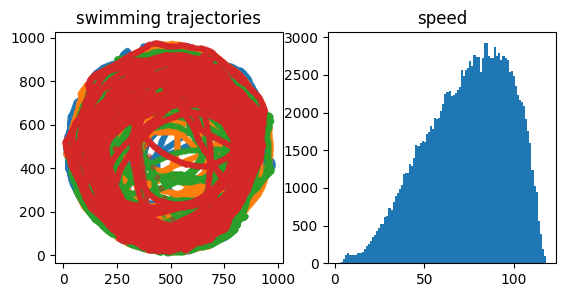

labels.vDavid_8wpf_070122_3.analysis
8wpf 4 0.3 [5.81023454 5.65771908 5.826177   5.66423385]


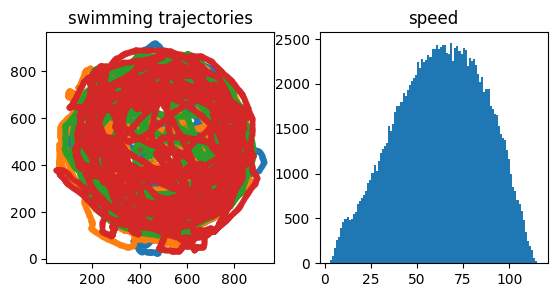

labels.vDavid_8wpf_091622_1.analysis
8wpf 4 0.3 [5.668947   5.76568578 5.6357809  5.79814247]


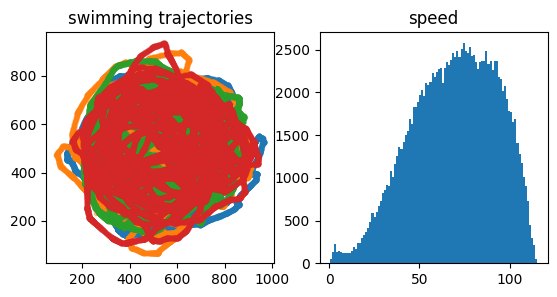

labels.vDavid_8wpf_091622_2.analysis
8wpf 4 0.3 [5.63906861 5.64763281 5.7980314  5.65011271]


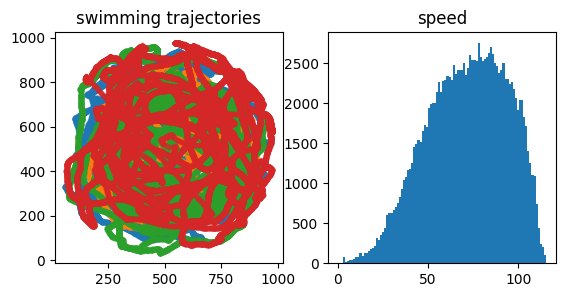

In [ ]:
# from traitlets.config.configurable import SingletonConfigurable
# loop through all experiment in the log

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    print(str(exp))

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    print(exp_type, fish_num, scale, bodylength)

    plt.figure(figsize=[10,3])
    plt.subplot(131)
    for f in range(fish_num):
      plt.scatter(f_x[f],f_y[f],alpha=0.4, s=10)
    plt.title('swimming trajectories')

    plt.subplot(132)
    tmp=[]
    for f in range(fish_num):
      [tmp.append(x) for x in f_speed[f]]
    plt.hist(tmp, bins=100)
    plt.title('speed')

    plt.show()



heading correlations


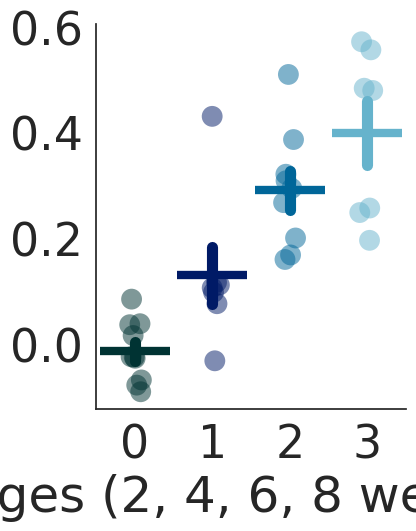

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  23.596248196248183 P-value:  3.032898130015544e-05
          wk2       wk4       wk6       wk8
wk2  1.000000  0.528251  0.000683  0.000126
wk4  0.528251  1.000000  0.385732  0.112835
wk6  0.000683  0.385732  1.000000  1.000000
wk8  0.000126  0.112835  1.000000  1.000000
group #, N, MEANS, and SEM
0 10 -0.013827293853858702 0.0180017125844207
normality test is ShapiroResult(statistic=0.9498113989830017, pvalue=0.6662697792053223)
1 7 0.12939755287325752 0.053796319284287936
normality test is ShapiroResult(statistic=0.7519879341125488, pvalue=0.013308637775480747)
2 9 0.2905615343866065 0.03713114059998159
normality test is ShapiroResult(statistic=0.9350731372833252, pvalue=0.5310954451560974)
3 7 0.3988450813778953 0.06019336630513594
normality test is ShapiroResult(statistic=0.8483250737190247, pvalue=0.11863377690315247)


In [ ]:
#PLOT angle correlations (one average value across the group)

plt.figure(figsize=[4,5])

wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        data = np.vstack(f_heading)
        corr_matrix = np.corrcoef(data)
        off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        s.append(np.mean(off_diagonal_elements))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('heading correlations')
sns.despine()
plt.savefig(figure_savepath +"_heading_direction_correlations.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))


bodylength (mm)


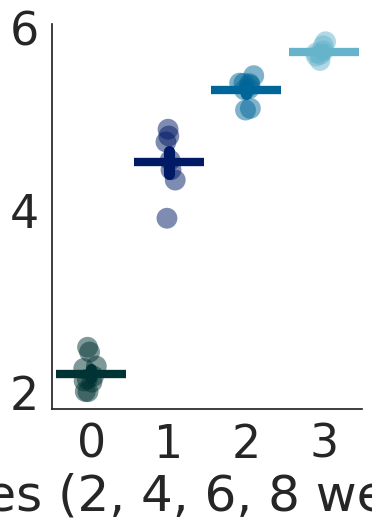

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  29.87700534759358 P-value:  1.4647625810715548e-06
          wk2       wk4       wk6       wk8
wk2  1.000000  0.446771  0.001225  0.000002
wk4  0.446771  1.000000  0.603910  0.011784
wk6  0.001225  0.603910  1.000000  0.603910
wk8  0.000002  0.011784  0.603910  1.000000


In [ ]:
#PLOT BODYLENGTH
plt.figure(figsize=[4,5])

wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean(bodylength))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('bodylength (mm)')
sns.despine()
plt.savefig(figure_savepath +"_bodylength.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


fraction time moving


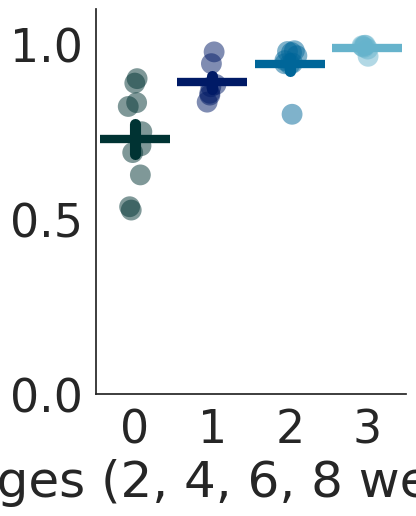

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  23.62368220015277 P-value:  2.9931870915818536e-05
          wk2       wk4       wk6       wk8
wk2  1.000000  0.569701  0.014988  0.000016
wk4  0.569701  1.000000  1.000000  0.031470
wk6  0.014988  1.000000  1.000000  0.397132
wk8  0.000016  0.031470  0.397132  1.000000
length of recording (s)


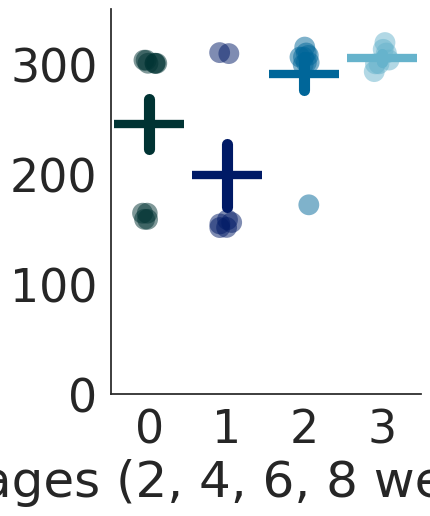

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  8.481128747795404 P-value:  0.037047511127196175
          wk2       wk4       wk6       wk8
wk2  1.000000  1.000000  0.431780  0.568376
wk4  1.000000  1.000000  0.103113  0.150430
wk6  0.431780  0.103113  1.000000  1.000000
wk8  0.568376  0.150430  1.000000  1.000000


In [ ]:
#PLOT fraction time moving (more than 2.0 body lengths/s), and video recording time
thresh=2.0

plt.figure(figsize=[4,5])

wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean([sum([1 for d in i if d/j > thresh])/len(i) for i,j in zip(f_speed,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
plt.ylim(0,1.1)
print('fraction time moving')
sns.despine()
plt.savefig(figure_savepath +"_fraction_time_moving.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.01:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.figure(figsize=[4,5])
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    exp_type, f_x, fps = data['exp_type'], data['f_x'], data['fps']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(len(f_x[0])/fps)

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.ylim(0,350)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('length of recording (s)')
sns.despine()
plt.savefig(figure_savepath +"_recording_length.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)

group area/bodylength


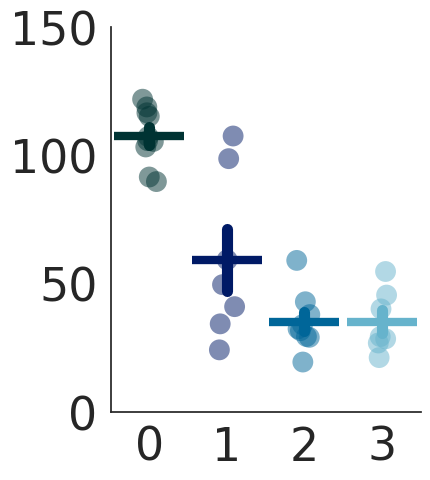

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  34.47665254650128 P-value:  1.0722541577181776e-09
              wk2       wk4           wk6           wk8
wk2  1.000000e+00  0.002726  3.690644e-10  9.132375e-09
wk4  2.726387e-03  1.000000  3.136538e-01  5.252258e-01
wk6  3.690644e-10  0.313654  1.000000e+00  1.000000e+00
wk8  9.132375e-09  0.525226  1.000000e+00  1.000000e+00
group #, N, MEANS, and SEM
0 10 107.47814852237548 3.4498869479199077
normality test is ShapiroResult(statistic=0.9272274971008301, pvalue=0.4211820960044861)
1 7 59.17256287876315 12.110434187223744
normality test is ShapiroResult(statistic=0.8888108730316162, pvalue=0.26851770281791687)
2 9 35.04097543523954 3.683693274611042
normality test is ShapiroResult(statistic=0.903929591178894, pvalue=0.27566713094711304)
3 7 35.12749520967376 4.519595268119906
normality test is ShapiroResult(statistic=0.9274223446846008, pvalue=0.5291965007781982)


In [ ]:
#PLOT Group area
plt.figure(figsize=[4,5])

wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    group_area = data['group_area']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean(group_area)/np.mean(bodylength))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
#plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('group area/bodylength')
sns.despine()
plt.ylim(0,150)
plt.savefig(figure_savepath +"_group_area.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(wk2,wk4,wk6,wk8)
print("F-statistic: ", f_statistic, "P-value: ", p_value)

if p_value < 0.05:
    posthoc = sp.posthoc_ttest(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))


speed


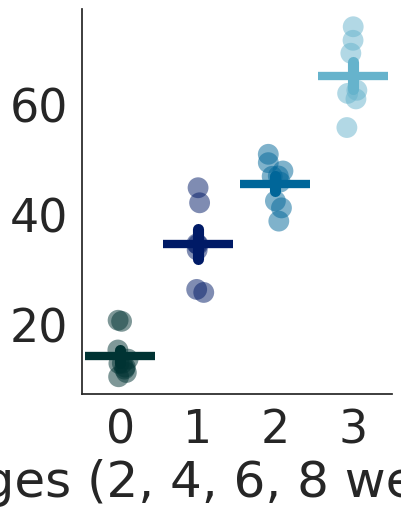

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  29.089296324590407 P-value:  2.1447300787079997e-06
          wk2       wk4       wk6       wk8
wk2  1.000000  0.318929  0.001993  0.000002
wk4  0.318929  1.000000  1.000000  0.018613
wk6  0.001993  1.000000  1.000000  0.474828
wk8  0.000002  0.018613  0.474828  1.000000
speed/bodylength


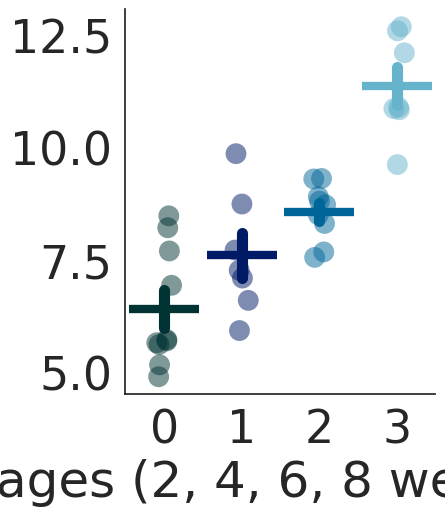

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  22.61458280281809 P-value:  4.8585575308244074e-05
          wk2       wk4       wk6       wk8
wk2  1.000000  1.000000  0.052612  0.000022
wk4  1.000000  1.000000  1.000000  0.014178
wk6  0.052612  1.000000  1.000000  0.195676
wk8  0.000022  0.014178  0.195676  1.000000
group #, N, MEANS, and SEM
0 10 6.407908956278916 0.4151744071147283
normality test is ShapiroResult(statistic=0.865947961807251, pvalue=0.08963868021965027)
1 7 7.602240672696189 0.5029694462428801
normality test is ShapiroResult(statistic=0.9594311714172363, pvalue=0.8138397932052612)
2 9 8.567662914591907 0.21024597196376796
normality test is ShapiroResult(statistic=0.9176924824714661, pvalue=0.3734786808490753)
3 7 11.377150963101371 0.425846995223913
normality test is ShapiroResult(statistic=0.901595950126648, pvalue=0.340754896402359)


In [ ]:
#PLOT SPEED (raw and by bodylength)
plt.figure(figsize=[4,5])

wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i) for i in f_speed]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('speed')
sns.despine()
plt.savefig(figure_savepath +"_speed.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.figure(figsize=[4,5])
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i)/j for i,j in zip(f_speed,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('speed/bodylength')
sns.despine()
plt.savefig(figure_savepath +"_speed_bodylength-norm.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))


In [ ]:
#PLOT Inter-animal distance IID

plt.figure(figsize=[4,5])
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        if exp_type==ages[0]:
          arena=150.0
        else:
          arena=300.0
        s.append(np.mean([(np.mean(i)/(j))/arena for i,j in zip(f_IID,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('f_IID/arena diameter')
sns.despine()
plt.savefig(figure_savepath +"_mean_inter-animal_distance_arena-fraction.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


NameError: name 'plt' is not defined

In [ ]:
#PLOT Inter-animal distance (just closest fish)
plt.figure(figsize=[4,5])
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        if exp_type==ages[0]:
          arena=150.0
        else:
          arena=300.0
        s.append(np.mean([(np.mean(i)/(j))/arena for i,j in zip(f_closest_dist,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
print('closest fish distance: fraction of arena diameter')
sns.despine()
plt.savefig(figure_savepath +"_closest_fish_distance_arena-fraction.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(['wk2', 'wk4', 'wk6', 'wk8'],
                       repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2]), len(summary_data[3])])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(wk2,wk4,wk6,wk8)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


NameError: name 'plt' is not defined

speed_v_alignment


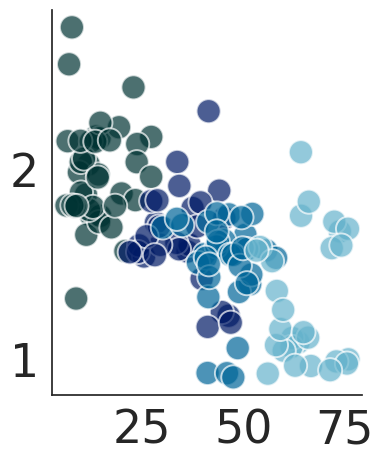

speed_v_dist


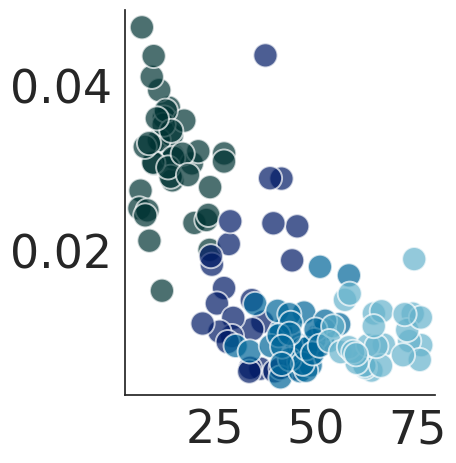

aggegation_v_alignment


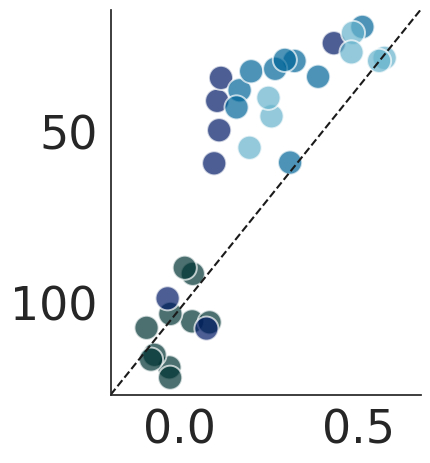

In [ ]:
#look at the scatterplot between speed and circular variance (define hue by age or size)

plt.figure(figsize=[4,5])

ages = ['2wpf','4wpf','6wpf','8wpf']

speedz=[];
ang_variancez=[];
agez=[];

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for s,i in zip(f_speed, f_closest_align):
        speedz.append(np.mean(s))
        ang_variancez.append(circstd(np.deg2rad(i)))
        agez.append(str(exp_type)[0])

sns.scatterplot(x=speedz,y=ang_variancez, s=300, hue=agez, palette='ocean', alpha=0.7, legend=False)
#plt.xlabel('speed (mm/s)')
#plt.ylabel('alignment STD')
print('speed_v_alignment')
sns.despine()
plt.savefig(figure_savepath +"_speed_v_alignment_scatter.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


plt.figure(figsize=[4,5])
speedz=[];
distez=[];
agez=[];

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for s,i,j in zip(f_speed, f_IID, bodylength):
        if exp_type==ages[0]:
          arena=150.0
        else:
          arena=300.0
        speedz.append(np.mean(s))
        distez.append((np.mean(i)/(j))/arena)
        agez.append(str(exp_type)[0])

sns.scatterplot(x=speedz,y=distez, s=300, hue=agez, palette='ocean', alpha=0.7, legend=False)
#plt.xlabel('speed (mm/s)')
#plt.ylabel('distance (fraction of arena)')
print('speed_v_dist')
sns.despine()
plt.savefig(figure_savepath +"_speed_v_distance_scatter.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


plt.figure(figsize=[4,5])

ages = ['2wpf','4wpf','6wpf','8wpf']

aggregating=[];
aligning=[];
agez=[];

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']
    group_area = data['group_area']*scale

    data = np.vstack(f_heading)
    corr_matrix = np.corrcoef(data)
    off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]

    agez.append(str(exp_type)[0])
    aligning.append(np.mean(off_diagonal_elements))
    aggregating.append(np.mean(group_area)/np.mean(bodylength))

sns.scatterplot(x=aligning,y=aggregating, s=300, hue=agez, palette='ocean', alpha=0.7, legend=False)
plt.plot([min(aligning)-0.1,max(aligning)+0.1],[max(aggregating)+5,min(aggregating)-5], color='k', linestyle="--")
plt.ylim(max(aggregating)+5,min(aggregating)-5)
plt.xlim(min(aligning)-0.1,max(aligning)+0.1)
#plt.xlabel('heading correlation (r)')
#plt.ylabel('group area (bodylengths^2)')
print('aggegation_v_alignment')
sns.despine()
plt.savefig(figure_savepath +"_aggregation_v_alignment_scatter.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


OCCUPANCY MAPS


<ipython-input-83-72f5885ed8a7>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,4,ndx+1)
<ipython-input-83-72f5885ed8a7>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6)


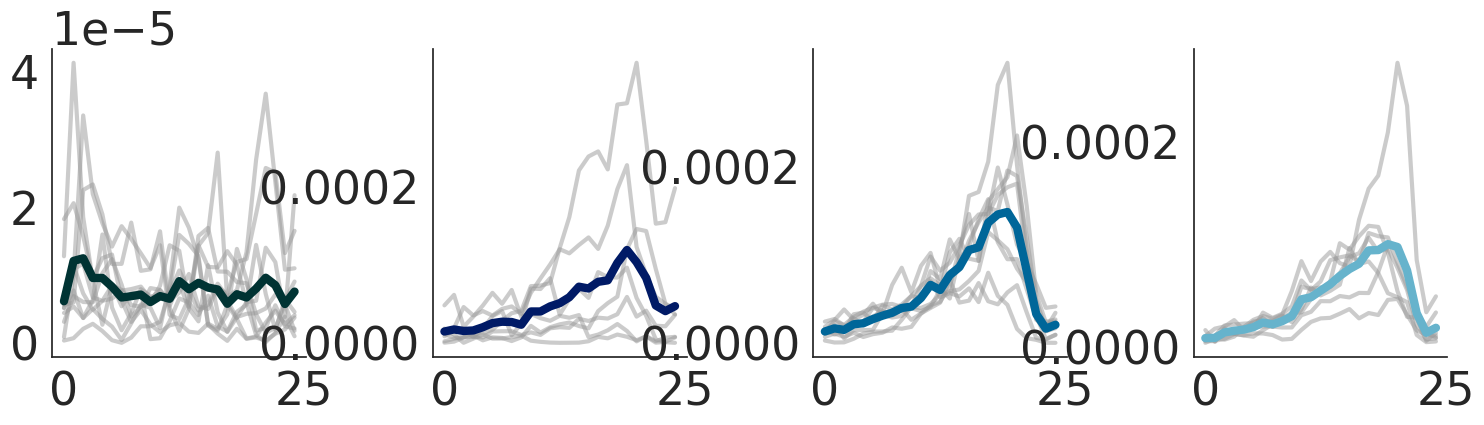

<ipython-input-83-72f5885ed8a7>:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6, alpha=0.7)


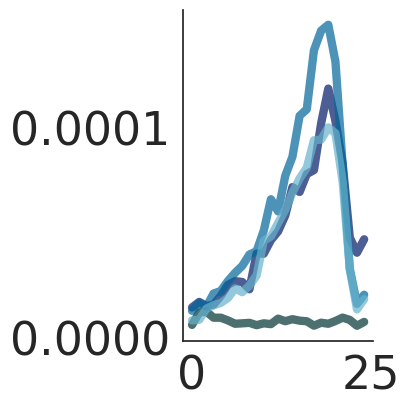

'\n#in mm\nwk2=[]; wk4=[]; wk6=[]; wk8=[];\nsummary_data = [wk2,wk4,wk6,wk8]\nages = [\'2wpf\',\'4wpf\',\'6wpf\',\'8wpf\']\n\nfor exp in experiments:\n  if os.path.isfile(path + exp + \'/\' + exp + \'_lev0_basics.npz\') == True:\n    folder = path + exp + \'/\'\n    data = np.load(folder + exp + \'_lev0_basics.npz\')\n    fish_num, scale, bodylength = data[\'fish_num\'], data[\'scale\'], data[\'f_bodylength_mm\']\n    exp_type, f_x, f_y = data[\'exp_type\'], data[\'f_x\'], data[\'f_y\']\n    f_heading, f_speed = data[\'f_heading\'], data[\'f_speed\']*scale\n\n    data = np.load(folder + exp + \'_lev1_egomaps_100mm_full_experiment.npz\')\n    occupancy_maps,f_alignment_maps = data[\'occupancy_maps\'],data[\'f_alignment_maps\']\n    f_speed_maps,f_ang_speed_maps = data[\'f_speed_maps\'],data[\'f_ang_speed_maps\']\n\n    for a,s in zip(ages,summary_data):\n      if exp_type==a:\n        s.append(np.mean(occupancy_maps, axis=0))\n\nplt.figure(figsize=[24,8])\nfor ndx,tmp in enumerate(summa

In [ ]:
#get average ego maps.  *compare to shuffled within dataset (rand temporal shift each fish (np. roll))
#+ get slice through 0/0 and plot across ages (**get value from this - aggregation)
#(raw and normalized to body size)
from mpl_toolkits.axes_grid1 import make_axes_locatable

print("OCCUPANCY MAPS")

#bodylength normalized
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev1_egomaps_6bodylengths_full_experiment.npz')
    occupancy_maps,f_alignment_maps = data['occupancy_maps'],data['f_alignment_maps']
    f_speed_maps,f_ang_speed_maps = data['f_speed_maps'],data['f_ang_speed_maps']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean(occupancy_maps, axis=0))

plt.figure(figsize=[24,8])
for ndx,tmp in enumerate(summary_data):
  print(np.shape(tmp))
  ax = plt.subplot(1,4,ndx+1)
  #plt.title('egocentric occupancy - 6 body lengths ()')
  im = ax.imshow(scipy.ndimage.gaussian_filter(np.mean(tmp,axis=0), sigma=1.0), cmap='Greys')#, vmin=0, vmax=0.0001)
  plt.xticks([])
  plt.yticks([])
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im, cax=cax)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig(figure_savepath +"_occupancy_maps_6bodylengths.pdf", transparent=True)
plt.show()


plt.figure(figsize=[18,4])
plt.title('egocentric occupancy - 6 body lengths ()')
for ndx,tmp in enumerate(summary_data):
  ax = plt.subplot(1,4,ndx+1)
  mean_array=[(np.mean(i[23:26,:],axis=0)) for i in tmp]
  linetmp = [[((tt[i] + tt[int(49-i)])) for i in range(25)] for tt in mean_array]
  for i in linetmp:
    plt.plot(i, color='0.6', linewidth=3, alpha=0.5)
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6)
  sns.despine()
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.savefig(figure_savepath +"_occupancy_traces_6bodylengths_individuals.pdf", transparent=True)
plt.show()


plt.figure(figsize=[5,5])
for ndx,tmp in enumerate(summary_data):
  mean_array=[(np.mean(i[23:26,:],axis=0)) for i in tmp]
  linetmp = [[((tt[i] + tt[int(49-i)])) for i in range(25)] for tt in mean_array]
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6, alpha=0.7)
  sns.despine()
plt.tight_layout()
#plt.ylim(0,1.5)
plt.savefig(figure_savepath +"_occupancy_traces_6bodylengths.pdf", transparent=True)
plt.show()


OCCUPANCY MAPS - shuffle


<ipython-input-86-5cb1e65a44d0>:55: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,4,ndx+1)
<ipython-input-86-5cb1e65a44d0>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6)


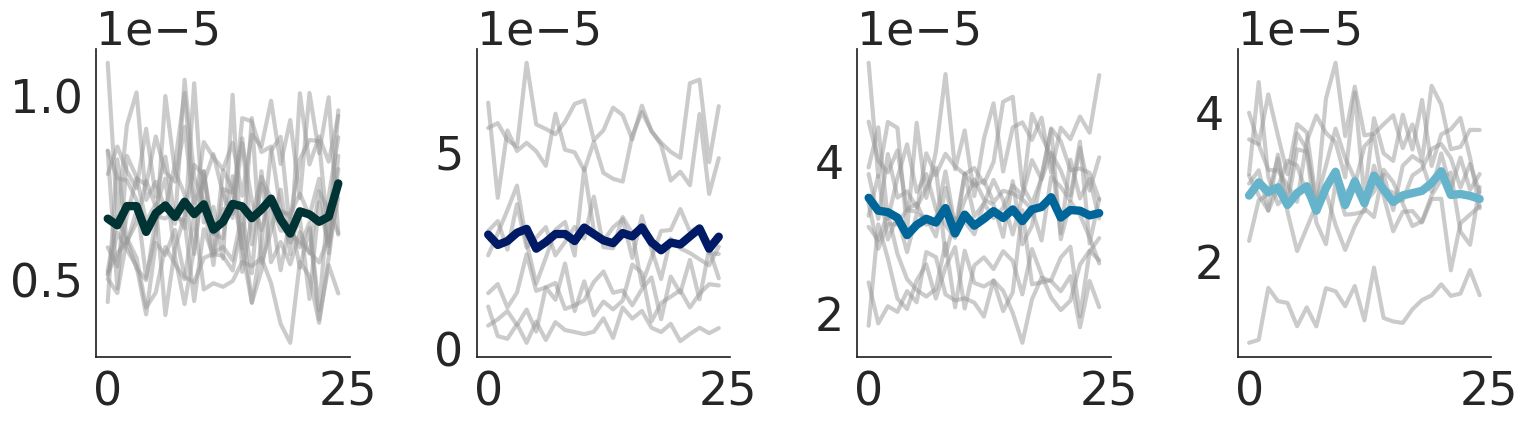

<ipython-input-86-5cb1e65a44d0>:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6, alpha=0.7)


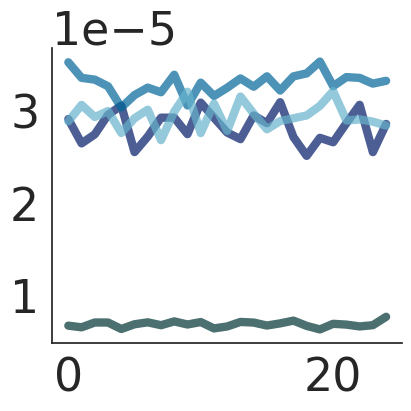

'\n#in mm\nwk2=[]; wk4=[]; wk6=[]; wk8=[];\nsummary_data = [wk2,wk4,wk6,wk8]\nages = [\'2wpf\',\'4wpf\',\'6wpf\',\'8wpf\']\n\nfor exp in experiments:\n  if os.path.isfile(path + exp + \'/\' + exp + \'_lev0_basics.npz\') == True:\n    folder = path + exp + \'/\'\n    data = np.load(folder + exp + \'_lev0_basics.npz\')\n    fish_num, scale, bodylength = data[\'fish_num\'], data[\'scale\'], data[\'f_bodylength_mm\']\n    exp_type, f_x, f_y = data[\'exp_type\'], data[\'f_x\'], data[\'f_y\']\n    f_heading, f_speed = data[\'f_heading\'], data[\'f_speed\']*scale\n\n    data = np.load(folder + exp + \'_lev1_egomaps_100mm_full_experiment.npz\')\n    occupancy_maps,f_alignment_maps = data[\'occupancy_maps\'],data[\'f_alignment_maps\']\n    f_speed_maps,f_ang_speed_maps = data[\'f_speed_maps\'],data[\'f_ang_speed_maps\']\n\n    for a,s in zip(ages,summary_data):\n      if exp_type==a:\n        tmp=[]\n        for array_2d in occupancy_maps:\n          flattened = array_2d.flatten()\n          np

In [ ]:
#get average ego maps.  *compare to shuffled within dataset (rand temporal shift each fish (np. roll))
#+ get slice through 0/0 and plot across ages (**get value from this - aggregation)
#(raw and normalized to body size)
from mpl_toolkits.axes_grid1 import make_axes_locatable

print("OCCUPANCY MAPS - shuffle")

#bodylength normalized
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev1_egomaps_6bodylengths_full_experiment.npz')
    occupancy_maps,f_alignment_maps = data['occupancy_maps'],data['f_alignment_maps']
    f_speed_maps,f_ang_speed_maps = data['f_speed_maps'],data['f_ang_speed_maps']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        tmp=[]
        for array_2d in occupancy_maps:
          flattened = array_2d.flatten()
          np.random.shuffle(flattened)
          shuffled_array_2d = flattened.reshape(array_2d.shape)
          tmp.append(shuffled_array_2d)
        s.append(np.mean(tmp, axis=0))

plt.figure(figsize=[24,8])
for ndx,tmp in enumerate(summary_data):
  print(np.shape(tmp))
  ax = plt.subplot(1,4,ndx+1)
  #plt.title('egocentric occupancy - 6 body lengths ()')
  im = ax.imshow(scipy.ndimage.gaussian_filter(np.mean(tmp,axis=0), sigma=1.0), cmap='Greys')#, vmin=0, vmax=0.0001)
  plt.xticks([])
  plt.yticks([])
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im, cax=cax)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig(figure_savepath +"_occupancy_maps_6bodylengths_shuffle.pdf", transparent=True)
plt.show()


plt.figure(figsize=[18,4])
plt.title('egocentric occupancy - 6 body lengths ()')
for ndx,tmp in enumerate(summary_data):
  ax = plt.subplot(1,4,ndx+1)
  mean_array=[np.mean(i[23:28,:],axis=0) for i in tmp]
  linetmp = [[((tt[i] + tt[int(49-i)])) for i in range(25)] for tt in mean_array]
  for i in linetmp:
    plt.plot(i, color='0.6', linewidth=3, alpha=0.5)
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6)
  sns.despine()
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.savefig(figure_savepath +"_occupancy_traces_6bodylengths_shuffle_individual.pdf", transparent=True)
plt.show()

plt.figure(figsize=[5,5])
for ndx,tmp in enumerate(summary_data):
  mean_array=[np.mean(i[23:28,:],axis=0) for i in tmp]
  linetmp = [[((tt[i] + tt[int(49-i)])) for i in range(25)] for tt in mean_array]
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('ocean')(0.2*(ndx+1)), linewidth=6, alpha=0.7)
sns.despine()
plt.tight_layout()
#plt.ylim(0,1.5)
plt.savefig(figure_savepath +"_occupancy_traces_6bodylengths_shuffle.pdf", transparent=True)
plt.show()


In [ ]:
#get average ego maps.  *compare to shuffled within dataset (rand temporal shift each fish (np. roll))
#+ get slice through 0/0 and plot across ages (**get value from this - aggregation)
#(raw and normalized to body size)
from mpl_toolkits.axes_grid1 import make_axes_locatable

print("LINEAR SPEED MAPS")

#bodylength normalized
wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev1_egomaps_6bodylengths_full_experiment.npz')
    occupancy_maps,f_alignment_maps = data['occupancy_maps'],data['f_alignment_maps']
    f_speed_maps,f_ang_speed_maps = data['f_speed_maps'],data['f_ang_speed_maps']

    f_speed_maps = [val for sublist in f_speed_maps for val in sublist]

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean(f_speed_maps, axis=0))


plt.figure(figsize=[24,8])
for ndx,tmp in enumerate(summary_data):
  print(np.shape(tmp))
  ax = plt.subplot(1,4,ndx+1)
  #plt.title('egocentric speed - 6 body lengths ()')
  im = ax.imshow(scipy.ndimage.gaussian_filter(np.mean(tmp,axis=0), sigma=1.5), cmap='Greys')#, vmin=0, vmax=0.01)
  plt.xticks([])
  plt.yticks([])
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im, cax=cax)
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.savefig(figure_savepath +"_speed_maps_6bodylengths.pdf", transparent=True)
plt.show()



LINEAR SPEED MAPS


NameError: name 'experiments' is not defined

(1769796,)
(1003038,)
(1887738,)
(1541808,)


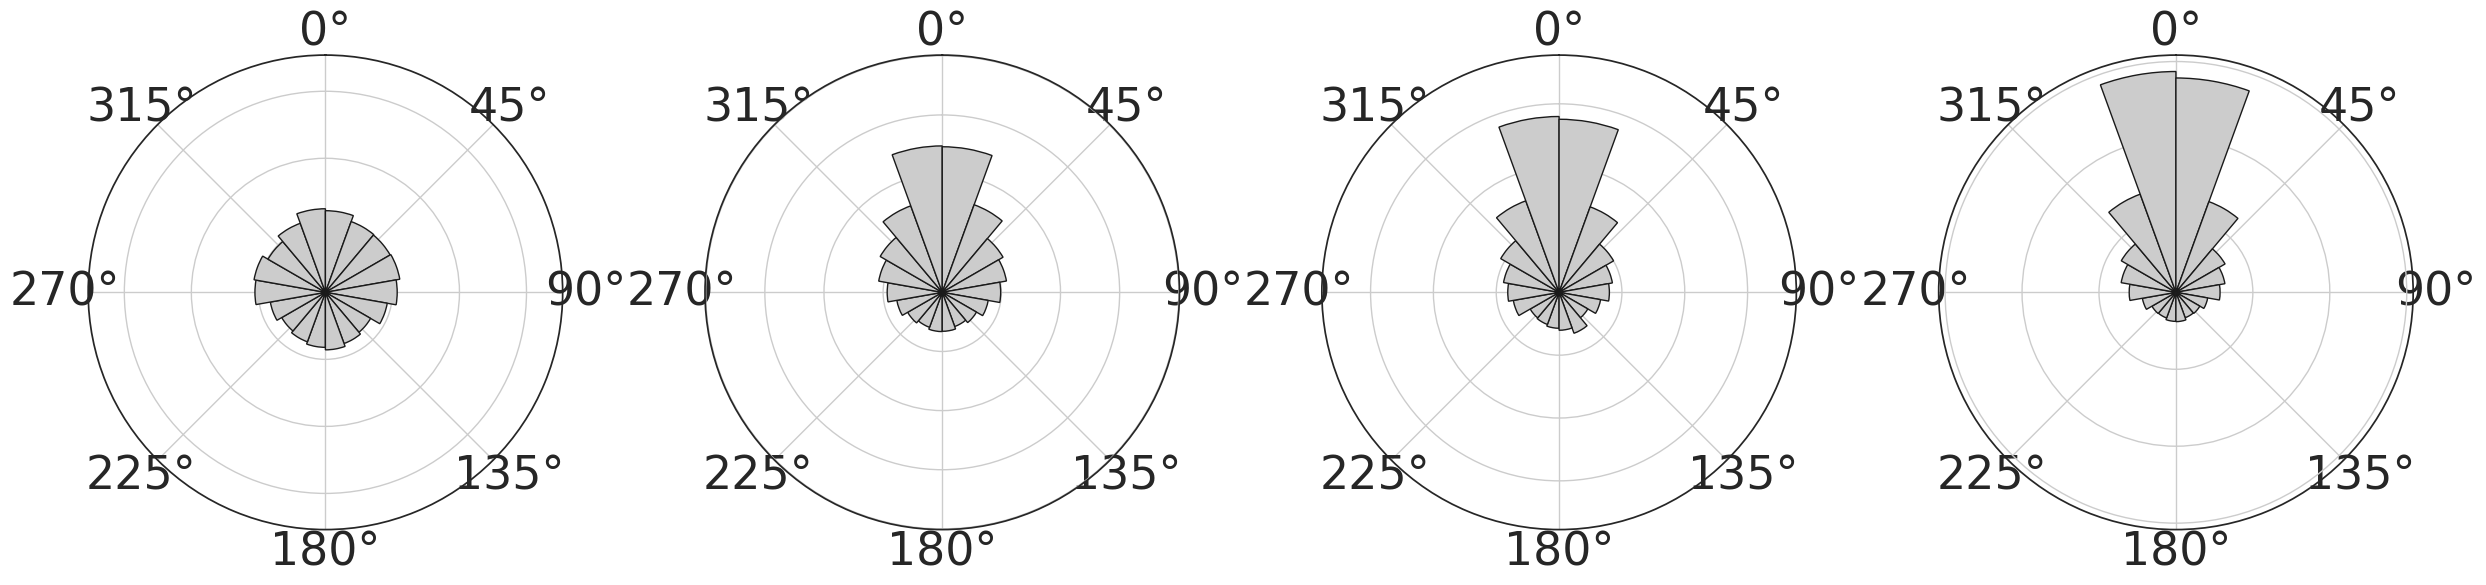

In [ ]:
#get head direction histograms  *compare to shuffled within dataset (rand temporal shift each fish (np. roll))
#+ get slice through 0/0 and plot across ages. (**get value from this - alignment)
#(raw and normalized to body size)

wk2=[]; wk4=[]; wk6=[]; wk8=[];
summary_data = [wk2,wk4,wk6,wk8]
ages = ['2wpf','4wpf','6wpf','8wpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    #f_closest_align = data['f_closest_align']
    f_IIA = data['f_IIA']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        f_IIA = [val for sublist in f_IIA for val in sublist]
        s.append(f_IIA)

fig = plt.figure(figsize=[30,10])
for ndx,tmp in enumerate(summary_data):
  tmp = [val for sublist in tmp for val in sublist]
  print(np.shape(tmp))
  ax = fig.add_subplot(1,4,ndx+1, projection='polar')
  bin_size = 20
  a, b=np.histogram(tmp, bins=np.arange(-180, 180+bin_size, bin_size))
  centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
  ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
  ax.set_theta_zero_location("N")
  ax.set_yticklabels([])
  ax.set_ylim(0,len(tmp)/5)
  ax.set_theta_direction(-1)
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.savefig(figure_savepath +"_heading_diff_polar.pdf", transparent=True)
plt.show()

